# Cycloids

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Straight Roll

Suppose we have a disk that rolls across the $x$-axis of an $xy$-plane without slipping or sliding.  At $t=0$, the disk is centered at $(0,a)$, where $a$ is the radius of said disk.  Let $A$ be the point on the edge of the disk that is at origin when $t=0$, $\mathbf{r}$ be the position vector that tracks $A$, and $\omega$ be the angular velocity of the disk as it rolls.

$$ \omega = \frac{\mathrm{d}\theta}{\mathrm{d}t} \quad\quad \mathbf{b} = \langle 0,a\rangle \quad\quad \mathbf{r} := \mathbf{r}(t) = \mathbf{a} + \mathbf{b} + \mathbf{c} $$

$$ \mathbf{a} := \mathbf{a}(\theta) = a\langle \cos \theta,\sin \theta\rangle \quad\quad\text{and}\quad\quad \mathbf{c} = \big\langle -a\Delta \theta, 0\big\rangle$$

$$ \theta := \theta(t) = \omega t - 0.5\pi \quad\quad\text{and}\quad\quad \Delta \theta = \theta -\theta_0 = \theta + 0.5\pi $$

$$ \mathbf{r} = \mathbf{r}(t) = \big\langle x(t),y(t)\big\rangle $$

$$ x:=x(t) = a\cos\theta(t) - a\big(\theta(t) + 0.5\pi\big) \quad\quad y:=y(t) = a\sin\theta(t) + a$$

$$ x = a\big(\cos\theta - \theta - 0.5\pi\big)\quad\quad\text{and}\quad\quad y = a(\sin\theta + 1)$$

$$ x = a(\cos\theta - \omega t) = a\big(\sin (\omega t) - \omega t\big)$$

$$ y = a\big(1-\cos(\omega t)\big)$$

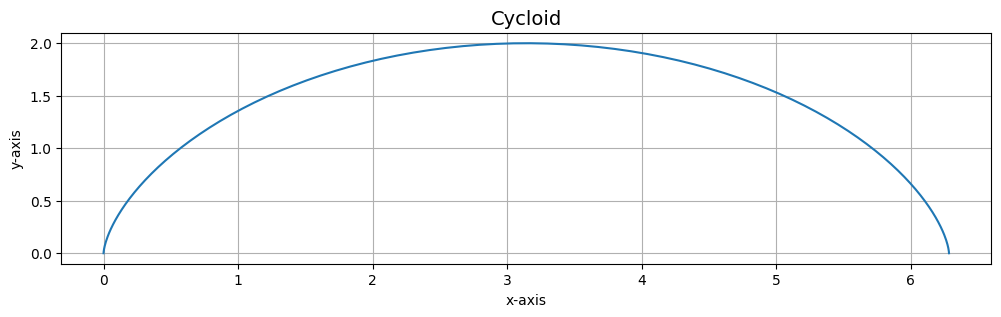

In [4]:
# Define certain parameters
omega = w = -2*np.pi
a = 1

# Define the domain of our cycloid.
t = np.linspace(0,1,num=200)
T = np.linspace(0,2*np.pi,num=200)
theta = omega*t - 0.5*np.pi

# Define the parametrization.
x = a*(np.cos(theta) - omega*t)
y = a*(np.sin(theta) + 1)

X = a*(T - np.sin(T))
Y = a*(1-np.cos(T))

# Create the figure and axes objects.
fig, ax = plt.subplots(figsize=(12,3))
ax.set_title('Cycloid',size=14)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.grid()

# Plot the cycloid.
ax.plot(x,y)
# ax.plot(X,Y,ls='--')

In [7]:
def floor_p(x,p=1):
    return p*np.floor(x/p)

floor_2pi = lambda x: floor_p(x,2*np.pi)

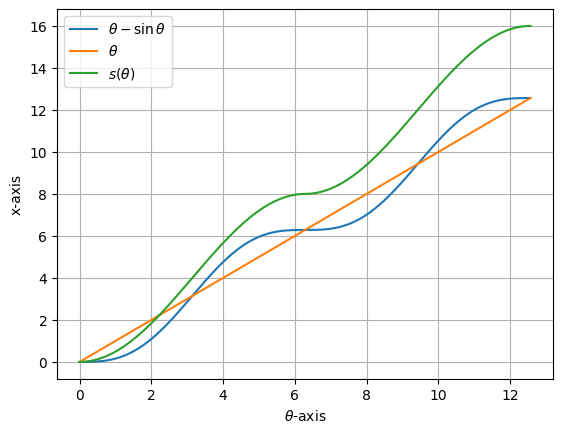

In [17]:
b = 1
t = theta = np.linspace(0,4*np.pi,num=200)
f = b*(t - np.sin(t))
g = 8*tau(t)/(2*np.pi) + 4*(1-np.cos(0.5*(t-tau(t))))

fig, ax = plt.subplots()
ax.set_xlabel(r'$\theta$-axis')
ax.set_ylabel(r'x-axis')
ax.grid()

ax.plot(t,f,label=r'$\theta-\sin\theta$')
ax.plot(t,t,label=r'$\theta$')
ax.plot(t,g,label=r'$s(\theta)$')
ax.legend()

In the above plot, it appears that $s(\theta)$ is proportional to $x(\theta)$.  

$$ s \propto x \quad\therefore\quad \exists Q\in\mathbb{R}\;:\; s = Qx$$

In the above line of reasoning, $Q$ is the supposed constant of proportionality between $s$ and $x$.  To find $\mathbf{P}(t)$, we could find $Q$.  To verify the premise of the above reasoning, let's compute the distributive derivative of $s(\theta)$, denoted as $s'(\theta)$.  Recall that:  

$$ s(\theta)= \frac{8b\tau}{2\pi} + 4b - 4b\cos\big(0.5(\theta-\tau)\big)$$

$$ s'(\theta) = 8b\sum_{i=0}^\infty \delta(\theta - 2\pi i) + 2b\left(1-2\pi\sum_{i=0}^\infty\delta(\theta-2\pi i)\right)\sin\big(0.5(\theta-\tau)\big)$$

$$ = 8b\sum_{i=0}^\infty\delta(\theta - 2\pi i) + 2b\sin\big(0.5(\theta-\tau)\big)$$

$$  = 8b\sum_{i=0}^\infty\delta(\theta-2\pi i) + 2b|\sin(0.5\theta)|$$

where $\delta()$ is the [Dirac-delta](https://en.wikipedia.org/wiki/Dirac_delta_function) function or $\delta$-distribution.  The infinite sum of these found in the above equation gives a series of impulse waves spaced out by $2\pi$ -- i.e. a distribution of impulse waves.  Note that I am uncertain about the last equality found in the above equation.

Note that differentiating throughout equation (2.4) with respect to $\theta$ gives:  

\begin{equation}\tag{2.5}
    s'(\theta) = 2b|\sin(0.5\theta)|
\end{equation}

Now let's compare that with the derivative of $x(\theta)$.  

\begin{equation}\tag{2.3a}
    x'(\theta) = b(1-\cos\theta) = b\big(1-2\cos^2 0.5\theta + 1\big)
\end{equation}

$$ = 2b\sin^2(0.5\theta) \quad\therefore$$

$$ |\sin(0.5\theta)| = \sqrt{\frac{x'(\theta)}{2b}}$$

Let  

$$ g(\theta) := \sum_{i=0}^\infty\delta(\theta-2\pi i)$$

$$ s'(\theta) = 8bg(\theta) + 2b|\sin(0.5\theta)| $$

$$ = 8bg(\theta) + \sqrt{2bx'(\theta)}$$

Via equations (2.3a) and (2.5),  

$$ s'(\theta) = \sqrt{2bx'(\theta)}$$

$$ \left(\frac{\mathrm{d}s}{\mathrm{d}\theta}\right)^2 = 2b\,\frac{\mathrm{d}x}{\mathrm{d}\theta}$$

### Analysing $x(\theta)$  

Note that $x'(\theta)$ has roots that equal the integer multiples of $2\pi$, the period of the cycloid.  That's not to say that $x(\theta)$ ever changes in the negative direction as $\theta$ increases;  Indeed, the fact that the roots of $x'(\theta)$ are a subset of the roots $x''(\theta)$ implies that the sign of $x'(\theta)$ is constant, which implies that $x'(\theta)$ is always non-negative.

## Cycloidal Roll  

Now, suppose we have a disk with a radius of $a$ rolling, without slipping or sliding, across the cycloid parametrized by:  

\begin{equation}\tag{2.1a,b}
    x := x(\theta) = b(\theta - \sin\theta) \quad\quad\text{and}\quad\quad y:=y(\theta) = b(1-\cos\theta)
\end{equation}

with an angular velocity of $\omega$.  At $t=0$, our disk is centered at $(-a,0)$.  Let $A$ be the point on the edge of the disk that is at origin when $t=0$.  We want to find a position vector $\mathbf{r}$ that tracks $A$ as the disk rolls across the cycloid.  Let $P=P(t)$ be the point in the cycloid that abbuts our disk at $t$;  The edge of the disk is tangential to the cycloid at $P$.  Now, let $\mathbf{P}$ be the position vector that tracks $P$.  The length of the segment of the cycloid from $P(0)$ to $P(t)$ is given by:  

\begin{equation}\tag{2.2}
    s(t) = a\omega t
\end{equation}

Let $\mathbf{a}$ be the vector that connects the center of our disk to $A$ and $\mathbf{b}$ be the vector that connects $P$ to the center of our disk.  

$$ \mathbf{r} = \mathbf{a} + \mathbf{b} + \mathbf{P} \quad\quad\text{and}\quad\quad \mathbf{a} := \mathbf{a}(t) = a\langle \cos\omega t,\sin\omega t\rangle$$

To find $\mathbf{b}$, first let $\mathbf{q}$ be the position vector that tracks our cycloid as a function of $\theta$.  

$$ \mathbf{q} := \mathbf{q}(\theta) = \big\langle x(\theta),y(\theta)\big\rangle$$

\begin{equation}\tag{2.3a,b}
    x'(\theta) = b(1-\cos\theta ) \quad\quad \text{and}\quad\quad y'(\theta) = b\sin\theta
\end{equation}

$$ \mathrm{d}\mathbf{q} = \langle \mathrm{d}x,\mathrm{d}y\rangle = b\langle 1-\cos\theta,\sin\theta\rangle$$

Of course $\mathrm{d}\mathbf{q}(\theta)$ is perpendicular to $\mathbf{b}(\theta)$.  Thus,  

$$ \hat{\mathbf{b}} = \frac{\langle -\mathrm{d}y,\mathrm{d}x\rangle}{|\mathrm{d}\mathbf{q}|} = \frac{\langle-\sin\theta,1-\cos\theta\rangle}{\sqrt{2-2\cos\theta}}$$

$$ \mathbf{b} = a\hat{\mathbf{b}}$$

Now, let's find length of the segment of the cycloid from origin to $\big(x(\theta),y(\theta)\big)$ as a function of $\theta$.  Recall that:  

$$ s(\theta) = \int_C \mathrm{d}s = \int_C \sqrt{(\mathrm{d}x)^2 + (\mathrm{d}y)^2}$$

where $C$ is said segment.  Via equations (2.3a,b),  

$$ |\mathrm{d}\mathbf{q}| = \sqrt{(\mathrm{d}x)^2 + (\mathrm{d}y)^2} = b\sqrt{2-2\cos\theta}\,\mathrm{d}\theta$$

$$ \sin 2\theta = 2\cos\theta\sin\theta$$

$$ \frac{\mathrm{d}\cos^2\theta}{\mathrm{d}\theta} = -2\cos\theta\sin\theta = -\sin2\theta$$

$$ -\int\sin2\theta\,\mathrm{d}\theta = 0.5\cos2\theta + K$$

Thus,  

$$ 0.5\cos2\theta + K = \cos^2\theta$$

$$ K = 0.5 \quad\therefore\quad 2\cos^2\theta = \cos2\theta + 1$$

$$ \therefore\quad \cos\theta = 2\cos^2 0.5\theta - 1$$

$$ |\mathrm{d}\mathbf{q}| = 2b|\sin0.5\theta|\,\mathrm{d}\theta$$

\begin{equation}\tag{2.4}
    s(\theta) = 2b\int_C|\sin0.5\theta|\,\mathrm{d}\theta  = s(2\pi)\,\frac{\tau}{2\pi} + 2b\int_\tau^\theta \sin0.5\theta\,\mathrm{d}\theta
\end{equation}

where  

$$ \tau := \tau(\theta) := \text{floor}_{2\pi}(\theta)$$

$$ s(2\pi) = 2b\int_0^{2\pi}\sin0.5\theta\,\mathrm{d}\theta = -4b\big.\big(\cos0.5\theta\big)\big]_0^{2\pi}$$

$$ =8b$$

Thus,  

$$ s(\theta) = 8b\,\frac{\tau}{2\pi} + 2b\int_\tau^\theta\sin0.5\theta\,\mathrm{d}\theta = \frac{8b\tau}{2\pi} - 4b\big.\big(\cos0.5\theta\big)\big]_0^{\theta-\tau} $$

$$ = \frac{8b\tau}{2\pi} + 4b - 4b\cos\big(0.5(\theta-\tau)\big)$$

Now, we need to find $\mathbf{q}(t)$ which is equal to $\mathbf{P}(t)$.  Via the above equation and the equation that gives $s$ as a function of $t$,  

$$ \frac{8b\tau}{2\pi} + 4b\Big(1-\cos\big(0.5(\theta-\tau)\big)\Big) = a\omega t $$

To find $\mathbf{P}(t)$, let's rewrite the parametrization of our cycloid so that it better squares with the above equation.  

$$ y = y(\theta) = b\big(1-\cos(\theta - \tau)\big)$$

In [12]:
tau = floor_2pi
g = 8*tau(t)/(2*np.pi) + 4*(1-np.cos(0.5*(t-tau(t))))

fig, ax = plt.subplots()
ax.set_xlabel

In [13]:
def s(theta,b=1):
    return 8*b*tau(theta)/(2*np.pi) + 4*b*(1-np.cos(0.5*(theta-tau(theta))))

In [14]:
s(0)

0.0

## Length

Now, let's try to find the length of the cycloid parametrized by the above two equations as a function of time or angle.

### Specific Integral 

The length of the cycloid from $t=0$ to $t=0$ is:  

$$ L = \int_C\,\mathrm{d}s = \int_C \sqrt{(\mathrm{d}x)^2 + (\mathrm{d}y)^2}$$

$$ x'(t) = -a\omega\sin\theta - a\omega = -a\omega(\sin\theta-1) \quad\quad\text{and}\quad\quad y'(t) = a\omega\cos\theta $$

$$ \mathrm{d}x = -a\omega(\sin\theta-1)\,\mathrm{d}t \quad\quad\text{and}\quad\quad \mathrm{d}y = a\omega\cos\theta\,\mathrm{d}t $$

$$ (\mathrm{d}x)^2 = (a\omega)^2\big(\sin^2\theta - 2\sin\theta + 1\big)\,(\mathrm{d}t)^2 \quad\quad\text{and}\quad\quad (\mathrm{d}y)^2 = (a\omega)^2\cos^2\theta\,(\mathrm{d}t)^2 $$

$$ \sqrt{(\mathrm{d}x)^2 + (\mathrm{d}y)^2} = a\omega\sqrt{2 - 2\sin\theta}\,\mathrm{d}t $$

$$ \sin\theta = \cos \omega t $$

$$ \sin 2\theta = 2\cos\theta\sin\theta $$

$$ \frac{\mathrm{d}\sin^2\theta}{\mathrm{d}\theta} = 2\cos\theta\sin\theta = \sin2\theta $$

$$ \int\sin2\theta\,\mathrm{d}\theta = K-0.5\cos2\theta $$

$$ K-0.5\cos2\theta = \sin^2\theta \quad\quad K = 0.5 $$

$$ 1-\cos2\theta = 2\sin^2\theta \quad\therefore\quad \cos2\theta = 1-2\sin^2\theta$$

$$ \cos\omega t = 1 - 2\sin^2(0.5\omega t)$$

$$ 2 - 2\sin\theta = 4\sin^2(0.5\omega t)$$

$$ a\omega \sqrt{2-2\sin\theta}\,\mathrm{d}t = 2a\omega|\sin(0.5\omega t)|\,\mathrm{d}t$$

Finally,  

$$ L = 2a\omega\int_0^1|\sin(0.5\omega t)|\,\mathrm{d}t$$

Assuming $a=1$ and $\omega=2\pi$,  

$$ L = 4\pi \int_0^1 \sin(\pi t)\,\mathrm{d}t = -4\big.\big(\cos(\pi t)\big)\big]_0^1$$

$$ = 8$$

### General Integral  

As for the length of the segment of the cycloid tracked by $\mathbf{r}$ from $t=0$ to $t$ -- i.e. the length of the path taken by $A$, the point on the edge of the rolling disk, as a function of time -- we will need to compute a general integral.

Assuming $a=1$ and $\omega = 2\pi$, the task of computing said general integral is easier.  Let  

$$ \tau := \tau(t):= \text{floor}(t)$$

where $\text{floor}(t)$ is the floor of $t$, which is equal to the non-negative whole number that is nearest to $t$ while still being less than or eqaul to $t$.  Eg.  

$$ \text{floor}(2.5) = 2 \quad\quad \text{floor}(2) = 2 \quad\quad \text{floor}(0.5) = 0$$

As for said length as a function of time,  

$$ s(t) = 8\tau + 4\pi\int_\tau^t\sin(\pi t)\,\mathrm{d}t =  8\tau - 4\big.\big(\cos(\pi t)\big)\big]_0^{t-\tau} $$

$$ = 8\tau + 4 - 4\cos\big(\pi(t-\tau) \big)$$

Without making any assumption about the radius of the disk and the angular velocity thereof, denoted as $a$ and $\omega$ respectively, it becomes a bit trickier.  Recall that:  

$$ \omega = 2\pi f \quad\quad\text{and}\quad\quad f = \frac{1}{p}$$

where $f$ and $p$ are the freqency and period, i.e., the amount of time it takes for the disk to make one revolution, recpectively.  

$$ 0 \le  \frac{\pi t}{p} \le \pi \quad\therefore\quad  0\le t \le p$$

Now, let  

$$ \tau := \tau_p = \text{floor}_p(t)$$

where $\text{floor}_p(t)$ is equal to the non-negative whole multiple of $p$ that is nearest to $t$, while still being less than or equal to $t$.  It might be helpful to note that  

$$ \text{floor}(t) = \text{floor}_1(t)$$ 

$$ s(t) = s(p)\frac{\tau}{p} + 2a\omega \int_\tau^t\sin(0.5\omega t)\,\mathrm{d}t$$

where  

$$ s(p) = 2a\omega \int_0^p\sin(0.5\omega t)\,\mathrm{d}t = -4a\big.\big(\cos(0.5\omega t)\big)\big]_0^p$$

$$ = 4a - 4a\cos(0.5\omega p) = 4a\big(1 - \cos\pi\big) = 8a$$

Thus,  

$$ s(t) = 8a\,\frac{\tau}{p} + 2a\omega\int_\tau^t \sin(0.5\omega t)\,\mathrm{d}t$$

$$ = 8a\,\frac{\tau}{p} - 4a\big.\big(\cos(0.5\omega t)\big)\big]_0^{t-\tau}$$

$$ = 8a\,\frac{\tau}{p} + 4a - 4a\cos\big(0.5\omega(t-\tau)\big)$$